In [1]:
#WPI DS504
#decision tree
#Anchit Mehta

In [82]:
#imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [3]:
#import csv
data2014 = pd.read_csv('2014_data.csv')
data2013 = pd.read_csv('2013_data.csv')

C:\Users\Anchit\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (39,40,41,42,43,60,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Anchit\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (39,40,41,42,43,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#select features to train the model
data1 = data2014[['resident_status','education_2003_revision','sex','race','marital_status','age_recode_12']]
data2 = data2013[['resident_status','education_2003_revision','sex','race','marital_status','age_recode_12']]

data_features = pd.concat([data1,data2], ignore_index=True)

In [5]:
#drop inf, blanks and NaN
data_features.replace([np.inf, -np.inf], np.nan)
data_features.replace('',np.nan,inplace=True)
data_features.dropna()

data_features = data_features.fillna(0)

#Drop unknown education
data_features.drop(data_features[data_features['education_2003_revision']==9].index , inplace=True)

#Drop unknown martial status
data_features.drop(data_features[data_features['marital_status']=="U"].index , inplace=True)

#Drop unknown age
data_features.drop(data_features[data_features['age_recode_12']==12].index , inplace=True)
data_features.drop(data_features[data_features['age_recode_12']==1].index , inplace=True)
data_features.drop(data_features[data_features['age_recode_12']==2].index , inplace=True)

#Drop unknown race or other
race = [38,58,68,78,7,0,8]
for i in race:
    data_features.drop(data_features[data_features['race']==i].index , inplace=True)

#remove floats
data_features.education_2003_revision = data_features.education_2003_revision.astype(int)

In [6]:
#Display data types of columns
data_features[['resident_status','education_2003_revision','sex','race','marital_status','age_recode_12']].dtypes

resident_status             int64
education_2003_revision     int32
sex                        object
race                        int64
marital_status             object
age_recode_12               int64
dtype: object

In [7]:
#split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(
    data_features.drop(columns=['age_recode_12'], axis=1),
    data_features['age_recode_12'],
    test_size=0.2,
    random_state=2017,
    shuffle=True)

In [8]:
#Display shape of train and test sets
print(x_train.shape)
print(x_test.shape)

(4020739, 5)
(1005185, 5)


In [9]:
#encode categorical values
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)
display(HTML(x_train.head().to_html()))

,resident_status,education_2003_revision,race,sex_F,sex_M,marital_status_D,marital_status_M,marital_status_S,marital_status_W
1251847,1,3,1,1,0,0,0,0,1
5082550,1,5,1,0,1,0,1,0,0
3232456,1,6,1,0,1,0,1,0,0
1042722,1,7,1,0,1,0,1,0,0
2379488,1,3,1,1,0,0,0,0,1


In [10]:
############################################
#This marks the end of implemnation of cleaning the data
#The cleaned data will be used in a decision tree
############################################

dec_tree = tree.DecisionTreeClassifier()
dec_tree = dec_tree.fit(x_train, y_train)

In [11]:
dec_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
#run model on test dataset
pred_test = dec_tree.predict(x_test) #predict labels

In [13]:
#Run model against the test set
metrics.accuracy_score(y_test, pred_test)

0.3980351875525401

In [27]:
###########################
#Decision Tree Optimization
###########################

#Maximum Depth
max_depth = list(range(1,21))
a0 = []
t = []
for i in max_depth:
    t0 = time.time()
    dec_tree = tree.DecisionTreeClassifier(max_depth=i).fit(x_train, y_train)
    pred_test = dec_tree.predict(x_test)
    a0.append(metrics.accuracy_score(y_test, pred_test))
    t1 = time.time()
    t.append(t1-t0)

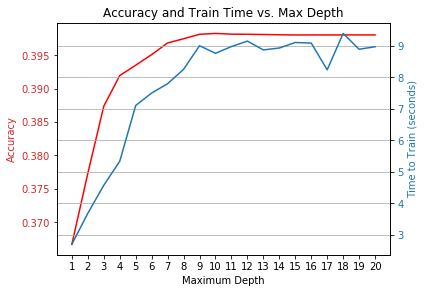

In [43]:
#Graph accuracy and time vs. max_depth
fig, ax1 = plt.subplots()

color='tab:red'
ax1.set_xlabel('Maximum Depth')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(max_depth,a0, color='r')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color='tab:blue'
ax2.set_ylabel('Time to Train (seconds)', color=color)
ax2.plot(max_depth,t, color=color)
ax2.tick_params(axis='y',labelcolor=color)

fig.tight_layout()
plt.grid(axis='both')
plt.xticks(max_depth)
plt.title('Accuracy and Train Time vs. Max Depth')
plt.show()

In [16]:
#Criterion    
criterion = ['gini','entropy']
for i in criterion:
    dec_tree = tree.DecisionTreeClassifier(criterion=i, max_depth=9).fit(x_train, y_train)
    pred_test = dec_tree.predict(x_test)
    print('Accuracy for', i, 'is', metrics.accuracy_score(y_test, pred_test)*100)

Accuracy for gini is 39.812770783487615
Accuracy for entropy is 39.792476011878406


In [53]:
#Minimum Samples for Split
min_samples = list(range(100, 1100, 100))
a1 = []
t = []
for i in min_samples:
    t0=time.time()
    dec_tree = tree.DecisionTreeClassifier(min_samples_split=i).fit(x_train, y_train)
    pred_test = dec_tree.predict(x_test)
    a1.append(metrics.accuracy_score(y_test, pred_test))
    t1=time.time()
    t.append(t1-t0)

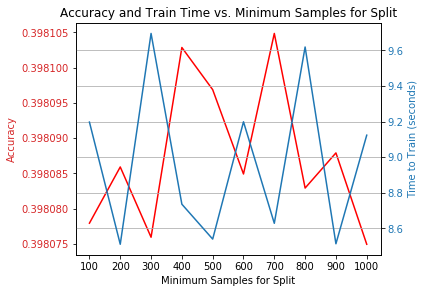

In [54]:
#Graph accuracy and time vs. min samples for split
fig, ax1 = plt.subplots()

color='tab:red'
ax1.set_xlabel('Minimum Samples for Split')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(min_samples,a1, color='r')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color='tab:blue'
ax2.set_ylabel('Time to Train (seconds)', color=color)
ax2.plot(min_samples,t, color=color)
ax2.tick_params(axis='y',labelcolor=color)

fig.tight_layout()
plt.grid(axis='both')
plt.xticks(min_samples)
plt.title('Accuracy and Train Time vs. Minimum Samples for Split')
plt.show()

In [56]:
#Maximum number of terminal nodes
max_term = list(range(12, 144, 6))
a0 = []
t = []
for i in max_term:
    t0=time.time()
    dec_tree = tree.DecisionTreeClassifier(max_leaf_nodes=i).fit(x_train, y_train)
    pred_test = dec_tree.predict(x_test)
    a0.append(metrics.accuracy_score(y_test,pred_test))
    t1=time.time()
    t.append(t1-t0)

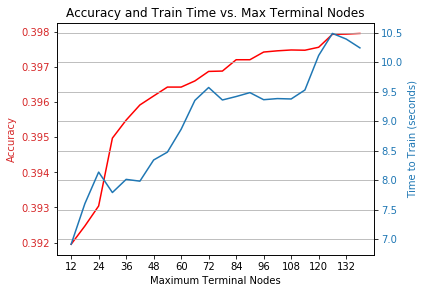

In [57]:
#Graph accuracy and time vs. max terminal nodes
fig, ax1 = plt.subplots()

color='tab:red'
ax1.set_xlabel('Maximum Terminal Nodes')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(max_term,a0, color='r')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color='tab:blue'
ax2.set_ylabel('Time to Train (seconds)', color=color)
ax2.plot(max_term,t, color=color)
ax2.tick_params(axis='y',labelcolor=color)

fig.tight_layout()
plt.grid(axis='both')
plt.xticks(np.arange(min(max_term), max(max_term)+1, 12))
plt.title('Accuracy and Train Time vs. Max Terminal Nodes')
plt.show()

In [58]:
#Max features considered for split
max_feat = list(range(1,5))
a0 = []
t = []
for i in max_feat:
    t0=time.time()
    dec_tree = tree.DecisionTreeClassifier(max_features=i).fit(x_train, y_train)
    pred_test = dec_tree.predict(x_test)
    a0.append(metrics.accuracy_score(y_test,pred_test))
    t1=time.time()
    t.append(t1-t0)

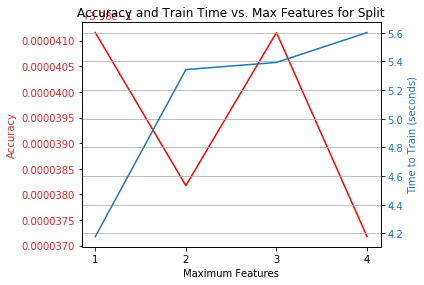

In [60]:
#Graph accuracy and time vs. max terminal nodes
fig, ax1 = plt.subplots()

color='tab:red'
ax1.set_xlabel('Maximum Features')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(max_feat,a0, color='r')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color='tab:blue'
ax2.set_ylabel('Time to Train (seconds)', color=color)
ax2.plot(max_feat,t, color=color)
ax2.tick_params(axis='y',labelcolor=color)

fig.tight_layout()
plt.grid(axis='both')
plt.xticks(max_feat)
plt.title('Accuracy and Train Time vs. Max Features for Split')
plt.show()

In [19]:
############################################
#This marks the end of implemnation of decision tree
#Using the same train and test sets developed above we will be applying them to random forest
############################################

In [62]:
#Train random forest model
randf = RandomForestClassifier(max_depth=8, 
                               random_state=2019, 
                               n_estimators=100, 
                               warm_start=True)
randf = randf.fit(x_train, y_train)

In [63]:
randf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=2019, verbose=0, warm_start=True)

In [64]:
#Display feature importance
randf.feature_importances_
importances = randf.feature_importances_
indices = np.argsort(importances)
features = x_train.columns

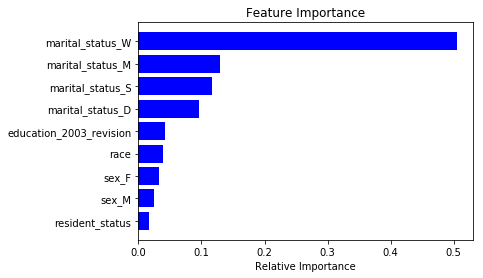

In [65]:
#Plot feature importance
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [66]:
#Predict opn the test dataset using the trained model
pred_test_rf = randf.predict(x_test)
pred_test_prob_rf = randf.predict_proba(x_test)

In [67]:
#Evaluate performance on test set
metrics.accuracy_score(y_test, pred_test_rf)

0.3975904932922795

In [68]:
#Optimization of number of trees
rf = RandomForestRegressor(n_estimators=1)
test_error = []
train_error = []

for i in range(50):
    rf.fit(x_train, y_train)
    y_train_predicted = rf.predict(x_train)
    y_test_predicted = rf.predict(x_test)
    mse_train = mean_squared_error(y_train, y_train_predicted)
    mse_test = mean_squared_error(y_test, y_test_predicted)
    test_error.append(mse_test)
    train_error.append(mse_train)
    rf.n_estimators += 1

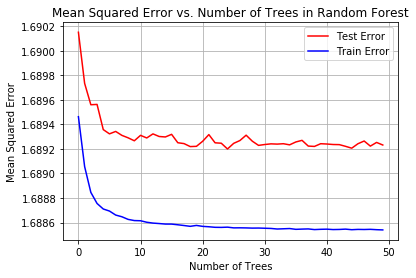

In [69]:
#plot MSE
trees = range(50)
plt.plot(trees, test_error, color='r', label='Test Error')
plt.plot(trees, train_error, color='b', label='Train Error')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Number of Trees in Random Forest')
plt.grid(axis='both')
plt.legend()
plt.show()

In [70]:
#Determine Time Performance for Model
t = []
accuracy = []
trees=range(1,50)
for i in trees:
    t0=time.time()
    randf_t = RandomForestClassifier(max_depth=10, 
                                   random_state=2019, 
                                   n_estimators=i)
    randf_t = randf_t.fit(x_train, y_train)
    pred_test_rf = randf.predict(x_test)
    f=metrics.accuracy_score(y_test, pred_test_rf)
    t1=time.time()
    accuracy.append(f)
    t.append(t1-t0)

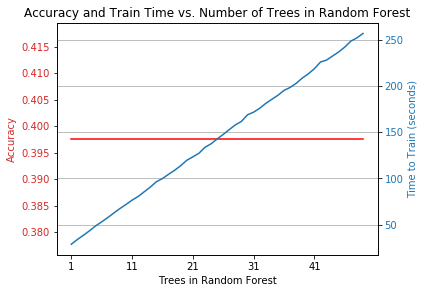

In [73]:
#Graph accuracy and time vs. Trees in random forest
fig, ax1 = plt.subplots()

color='tab:red'
ax1.set_xlabel('Trees in Random Forest')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(trees,accuracy, color='r')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color='tab:blue'
ax2.set_ylabel('Time to Train (seconds)', color=color)
ax2.plot(trees,t, color=color)
ax2.tick_params(axis='y',labelcolor=color)

fig.tight_layout()
plt.grid(axis='both')
plt.xticks(trees)
plt.xticks(np.arange(min(trees), max(trees), 10))
plt.title('Accuracy and Train Time vs. Number of Trees in Random Forest')
plt.show()

In [74]:
############################################
#This marks the end of implemnation of random forest
#Using the same train and test sets above I will now move to GBM
############################################

In [78]:
#train model GBM
gbm = GradientBoostingClassifier(max_depth=4, random_state=2019, n_estimators=100, verbose=1)
gbm = gbm.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1     7953809.0517           87.97m
         2     7608257.2038           86.54m
         3     7341049.0620           85.57m
         4     7127073.5529           84.73m
         5     6952245.8220           83.85m
         6     6806987.8961           82.91m
         7     6685332.8430           81.99m
         8     6582333.4392           81.16m
         9     6494762.5357           80.17m
        10     6419838.4936           79.30m
        20     6038258.4229           71.35m
        30     5922108.7300           62.76m
        40     5879928.6889           53.73m
        50     5862891.9207           44.64m
        60     5855227.5030           35.60m
        70     5851325.9399           26.68m
        80     5848923.3144           17.74m
        90     5847319.3338            8.85m
       100     5846323.0078            0.00s


In [79]:
#Initial accuracy
pred_test = gbm.predict(x_test)
metrics.accuracy_score(y_test, pred_test)

0.3982948412481285

In [85]:
#Train XGB model
xgb = XGBClassifier(max_depth=4, random_state=2019, n_estimators=10, verbose=1)
xgb = xgb.fit(x_train, y_train)

In [86]:
#Initial accuracy
pred_test = xgb.predict(x_test)
metrics.accuracy_score(y_test, pred_test)

0.3933773384998781

In [87]:
#XGB scalability n_estimators
a0 = []
t = []
n_est = list(range(1,50,10))

for i in n_est:
    t0=time.time()
    xgb=XGBClassifier(max_depth=4, random_state=2019, n_estimators=i).fit(x_train,y_train)
    pred_test=xgb.predict(x_test)
    a0.append(metrics.accuracy_score(y_test, pred_test))
    t1=time.time()
    t.append(t1-t0)

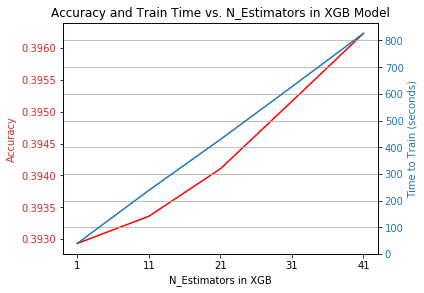

In [88]:
#Graph accuracy and time vs. n_estimators in XGB
fig, ax1 = plt.subplots()

color='tab:red'
ax1.set_xlabel('N_Estimators in XGB')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(n_est,a0, color='r')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color='tab:blue'
ax2.set_ylabel('Time to Train (seconds)', color=color)
ax2.plot(n_est,t, color=color)
ax2.tick_params(axis='y',labelcolor=color)

fig.tight_layout()
plt.grid(axis='both')
plt.xticks(n_est)
plt.title('Accuracy and Train Time vs. N_Estimators in XGB Model')
plt.show()